## **데이터 분석**

### 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm
from ast import literal_eval
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

### 함수 호출

In [4]:
# 문자열을 리스트로 변환
def str_to_list(x):
    try:
        return literal_eval(x)
    except: #해당 값이 null값이거나 오류가 있을 때, None을 return 하기
        return None
    
# 딕셔너리에서 키값만 반환
def dic_to_list(x):
    try:
        temp = []
        for i in x:
            temp.append(i["key"])
        if not temp:
            return None
        else:
            return temp
    except: #해당 값이 null값이거나 오류가 있을 때, None을 return 하기
        return None

def box_violin(x, lim):
    ax = sns.boxplot(x = x)
    ax = sns.violinplot(x =x)

    ax2 = plt.axes([0.6, 0.6, .2, .2])
    ax2 = sns.boxplot(x = x)
    ax2.set_xlim([0, lim])
    ax2.set_title('zoom')

### 데이터 확인

In [8]:
problem = pd.read_csv('problems.csv', encoding='utf-8') #solved.ac이랑 연동된 유저 데이터
user = pd.read_csv('users.csv', encoding='utf-8') #백준 문제 데이터
solved_problem = pd.read_csv('solved0-600.csv') #solved.ac 유저별 푼 문제 데이터

problem['tags'] = problem['tags'].apply(lambda x: str_to_list(x)) 
problem['titles'] = problem['titles'].apply(lambda x: str_to_list(x)) 
solved_problem['solved_problem'] = solved_problem['solved_problem'].apply(lambda x: str_to_list(x)) 
problem['tags'] = problem['tags'].apply(lambda x: dic_to_list(x)) 

###### 'handle': 사용자명, 'bio': 자기소개, 'badgeId': 뱃지아이디, 'backgroundId': 배경아이디, 'profileImageUrl': 사진링크,
###### 'solvedCount': 푼문제수, 'voteCount': 기여횟수, 'class': 클래스, 'classDecoration': 클래스수준, 'rivalCount': 라이벌수,
###### 'reverseRivalCount':역 라이벌수, 'tier':티어, 'rating':레이팅, 'exp':경험치, 'ratingByProblemsSum':푼문제 난이도 합으로 계산한 레이팅,
###### 'ratingByClass':클래스로 계산한 레이팅, 'ratingBySolvedCount': 푼문제수의 합으로 계산한 레이팅, 'ratingByVoteCount': 기여횟수로 계산한 레이팅,
###### 'maxStreak': 연속 문제풀이일 수, 'coins': 코인, 'stardusts': 별가루, 'joinedAt': 가입날짜, 'bannedUntil': 정지종료날짜,
###### 'proUntil': PRO종료날짜, 'rank': 순위, 'isRival', 'isReverseRival'

In [4]:
display(user.head(5))

,handle,bio,badgeId,backgroundId,profileImageUrl,solvedCount,voteCount,class,classDecoration,rivalCount,...,ratingByVoteCount,maxStreak,coins,stardusts,joinedAt,bannedUntil,proUntil,rank,isRival,isReverseRival
0,koosaga,NaN,orangecup,s2020-ruby1,https://static.solved.ac/uploads/profile/koosa...,12668,3411,10,gold,5,...,25,24,0,81200,2021-06-19T00:00:00.000Z,1970-01-01T00:00:00.000Z,2025-12-31T23:59:59.000Z,1,False,False
1,cki86201,NaN,NaN,abstract_001_light,NaN,6245,263,10,gold,0,...,25,5,0,16600,2021-06-19T00:00:00.000Z,1970-01-01T00:00:00.000Z,1970-01-01T00:00:00.000Z,2,False,False
2,mitnegativeinfinity,NaN,beta_contributor,balloon_001,NaN,2292,462,10,none,0,...,25,8,0,19375,2021-06-19T00:00:00.000Z,1970-01-01T00:00:00.000Z,1970-01-01T00:00:00.000Z,3,False,False
3,ainta,NaN,NaN,s2020-ruby1,NaN,4309,133,10,none,0,...,25,2,0,18755,2021-06-19T00:00:00.000Z,1970-01-01T00:00:00.000Z,1970-01-01T00:00:00.000Z,4,False,False
4,yclock,Let yclock Win ICPC WF! // Twitter: @youngyoju...,beta_contributor,ucpc2022,https://static.solved.ac/uploads/profile/ycloc...,2967,643,10,none,7,...,25,6,0,166994,2021-06-19T00:00:00.000Z,1970-01-01T00:00:00.000Z,1970-01-01T00:00:00.000Z,5,False,False


###### 'problemId': 문제아이디, 'titleKo': 한글제목, 'titles': 언어별제목, 'isSolvable': 채점가능여부, 'isPartial': 부분점수 여부,
###### 'acceptedUserCount': 맞은사람수, 'level': 문제레벨, 'votedUserCount': 기여자수, 'sprout': 새싹문제여부,
###### 'givesNoRating': 레이팅 주는지 여부, 'isLevelLocked': 난이도 기여제한 여부, 'averageTries': 평균시도횟수, 
###### 'official': 공식문제 여부, 'tags': 태그, 'metadata'

In [5]:
display(problem.head(5))

,problemId,titleKo,titles,isSolvable,isPartial,acceptedUserCount,level,votedUserCount,sprout,givesNoRating,isLevelLocked,averageTries,official,tags,metadata
0,1000,A+B,"[{'language': 'en', 'languageDisplayName': 'en...",True,False,245074,1,17,True,False,True,2.4848,True,"[implementation, arithmetic, math]",{}
1,1001,A-B,"[{'language': 'ko', 'languageDisplayName': 'ko...",True,False,208618,1,8,True,False,True,1.4197,True,"[implementation, arithmetic, math]",{}
2,1002,터렛,"[{'language': 'ko', 'languageDisplayName': 'ko...",True,False,32966,8,211,False,False,False,4.4892,True,"[case_work, geometry, math]",{}
3,1003,피보나치 함수,"[{'language': 'ko', 'languageDisplayName': 'ko...",True,False,44843,8,181,False,False,False,3.0853,True,[dp],{}
4,1004,어린 왕자,"[{'language': 'ko', 'languageDisplayName': 'ko...",True,False,13464,8,121,False,False,False,2.1931,True,"[geometry, math]",{}


In [6]:
# 사용자별 푼 문제
display(solved_problem.head(5))

,solved_problem
0,"[2502, 12106, 18483, 2795, 18947, 10826, 23413..."
1,"[2502, 11254, 12106, 16928, 18483, 15360, 1372..."
2,"[18855, 18483, 11622, 1372, 24661, 18947, 2341..."
3,"[11865, 1372, 24270, 2795, 10826, 15513, 11228..."
4,"[5565, 16928, 20090, 10759, 2753, 7644, 11622,..."


### 필요없는 데이터 제거

In [7]:
user_drop = ['bio', 'badgeId', 'backgroundId', 'profileImageUrl', 'voteCount', 'classDecoration', 'ratingByVoteCount',
             'coins', 'stardusts', 'joinedAt', 'bannedUntil', 'proUntil', 'isRival', 'isReverseRival']
user = user.drop(columns=user_drop, axis=1)
user

,handle,solvedCount,class,rivalCount,reverseRivalCount,tier,rating,exp,ratingByProblemsSum,ratingByClass,ratingBySolvedCount,maxStreak,rank
0,koosaga,12668,10,5,201,31,3290,17780255219,2840,250,175,24,1
1,cki86201,6245,10,0,37,31,3229,10290068847,2779,250,175,5,2
2,mitnegativeinfinity,2292,10,0,19,31,3182,6715798101,2732,250,175,8,3
3,ainta,4309,10,0,22,31,3180,8140632337,2730,250,175,2,4
4,yclock,2967,10,7,28,31,3146,4766727113,2696,250,175,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117495,youhk43,0,0,0,0,0,0,0,0,0,0,0,115105
117496,youjin1952,0,0,0,0,0,0,0,0,0,0,0,115105
117497,youjong12,0,0,0,0,0,0,0,0,0,0,0,115105
117498,youngin39,0,0,0,0,0,0,0,0,0,0,0,115105


In [9]:
problem_drop = ['titles', 'isPartial', 'votedUserCount', 'sprout', 
                'givesNoRating', 'givesNoRating', 'metadata', 'isLevelLocked']
problem = problem.drop(columns=problem_drop, axis=1)
problem

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,official,tags
0,1000,A+B,True,245074,1,2.4848,True,"[implementation, arithmetic, math]"
1,1001,A-B,True,208618,1,1.4197,True,"[implementation, arithmetic, math]"
2,1002,터렛,True,32966,8,4.4892,True,"[case_work, geometry, math]"
3,1003,피보나치 함수,True,44843,8,3.0853,True,[dp]
4,1004,어린 왕자,True,13464,8,2.1931,True,"[geometry, math]"
...,...,...,...,...,...,...,...,...
26435,28232,Windcatchers,True,0,0,0.0000,True,None
26436,28233,Magic with Cards,True,4,10,1.5000,True,"[bfs, graphs, graph_traversal]"
26437,28234,Iranian Hazfi Cup,True,1,0,2.0000,True,None
26438,28246,돌 가져가기 게임,True,7,23,1.7143,True,"[dp, game_theory, knapsack]"


### user 데이터 분석

#### - 유저 데이터 통계

In [9]:
user.describe()

,solvedCount,class,rivalCount,reverseRivalCount,tier,rating,exp,ratingByProblemsSum,ratingByClass,ratingBySolvedCount,maxStreak,rank
count,117500.000000,117500.000000,117500.000000,117500.000000,117500.000000,117500.000000,1.175000e+05,117500.000000,117500.000000,117500.000000,117500.000000,117500.000000
mean,118.833132,1.244970,0.519149,0.526162,7.083285,520.156587,5.277951e+06,423.391872,38.616128,57.738536,9.806749,58735.687311
std,216.566496,1.471907,2.952703,2.275909,5.107984,535.771521,9.157675e+07,447.501219,52.793821,46.051360,37.439901,33867.256209
min,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,24.000000,0.000000,0.000000,0.000000,3.000000,97.000000,3.149000e+04,61.000000,0.000000,20.000000,1.000000,29400.000000
50%,63.000000,1.000000,0.000000,0.000000,7.000000,308.000000,1.835690e+05,240.000000,25.000000,47.000000,3.000000,58739.000000
75%,139.000000,2.000000,0.000000,0.000000,11.000000,839.000000,1.129332e+06,704.000000,50.000000,87.000000,6.000000,88222.000000
max,12767.000000,10.000000,278.000000,201.000000,31.000000,3290.000000,1.778026e+10,2840.000000,250.000000,175.000000,684.000000,115105.000000


#### - 0 문제 푼 유저들 확인

In [10]:
user[user.solvedCount == 0]

,handle,solvedCount,class,rivalCount,reverseRivalCount,tier,rating,exp,ratingByProblemsSum,ratingByClass,ratingBySolvedCount,maxStreak,rank
103917,mulijoa,0,0,0,1,0,25,1750000,0,0,0,0,103975
104078,chsun0303,0,0,0,0,0,24,310000,0,0,0,0,104219
104498,fsedge,0,0,0,1,0,23,220000,0,0,0,1,104630
104700,b0n0b0n0,0,0,0,0,0,22,210000,0,0,0,0,104864
105192,cloudburst1398,0,0,0,0,0,21,170000,0,0,0,0,105343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117495,youhk43,0,0,0,0,0,0,0,0,0,0,0,115105
117496,youjin1952,0,0,0,0,0,0,0,0,0,0,0,115105
117497,youjong12,0,0,0,0,0,0,0,0,0,0,0,115105
117498,youngin39,0,0,0,0,0,0,0,0,0,0,0,115105


In [11]:
user[(user.solvedCount == 0) & ((user.rating !=0)|(user.exp !=0))]

,handle,solvedCount,class,rivalCount,reverseRivalCount,tier,rating,exp,ratingByProblemsSum,ratingByClass,ratingBySolvedCount,maxStreak,rank
103917,mulijoa,0,0,0,1,0,25,1750000,0,0,0,0,103975
104078,chsun0303,0,0,0,0,0,24,310000,0,0,0,0,104219
104498,fsedge,0,0,0,1,0,23,220000,0,0,0,1,104630
104700,b0n0b0n0,0,0,0,0,0,22,210000,0,0,0,0,104864
105192,cloudburst1398,0,0,0,0,0,21,170000,0,0,0,0,105343
108792,kangbada0728,0,0,0,0,0,12,60000,0,0,0,0,108882
112278,donghy9508,0,0,0,0,0,5,20000,0,0,0,0,112471
112302,janghs010604,0,0,0,0,0,5,20000,0,0,0,0,112471
114445,roigh12,0,0,0,0,0,2,10000,0,0,0,0,113686
114580,sovely97,0,0,0,0,0,2,10000,0,0,0,0,113686


푼 문제가 0인데 경험치와 레이팅 있는경우 : 해당 유저들은 solved.ac에서 제재당한 유저일 가능성이 큼
- 제거 후 분석 진행

In [12]:
ban_user = user[(user.solvedCount == 0) & ((user.rating !=0)|(user.exp !=0))].index
user = user.drop(index=ban_user).reset_index(drop=True)
user

,handle,solvedCount,class,rivalCount,reverseRivalCount,tier,rating,exp,ratingByProblemsSum,ratingByClass,ratingBySolvedCount,maxStreak,rank
0,koosaga,12668,10,5,201,31,3290,17780255219,2840,250,175,24,1
1,cki86201,6245,10,0,37,31,3229,10290068847,2779,250,175,5,2
2,mitnegativeinfinity,2292,10,0,19,31,3182,6715798101,2732,250,175,8,3
3,ainta,4309,10,0,22,31,3180,8140632337,2730,250,175,2,4
4,yclock,2967,10,7,28,31,3146,4766727113,2696,250,175,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117478,youhk43,0,0,0,0,0,0,0,0,0,0,0,115105
117479,youjin1952,0,0,0,0,0,0,0,0,0,0,0,115105
117480,youjong12,0,0,0,0,0,0,0,0,0,0,0,115105
117481,youngin39,0,0,0,0,0,0,0,0,0,0,0,115105


#### - 유저 클래스 통계

In [13]:
user['class'].describe()

count    117483.000000
mean          1.245150
std           1.471937
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          10.000000
Name: class, dtype: float64

#### - 유저 클래스 분포

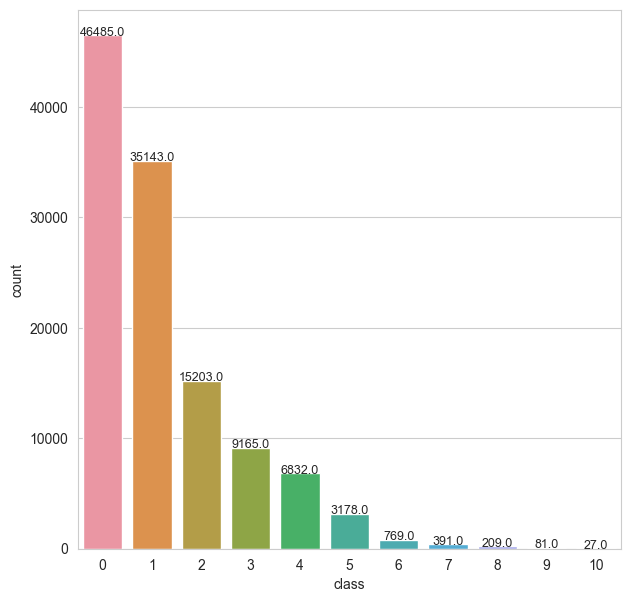

In [14]:
plt.figure(figsize=(7,7))
ax = sns.barplot(x = user['class'].value_counts().index, y = user['class'].value_counts())

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3.5, height, ha = 'center', size = 9)

클래스가 높아질수록 유저 수 감소

#### - 유저 티어 통계

In [15]:
user.tier.describe()

count    117483.000000
mean          7.084310
std           5.107643
min           0.000000
25%           3.000000
50%           7.000000
75%          11.000000
max          31.000000
Name: tier, dtype: float64

#### - 유저 티어 분포

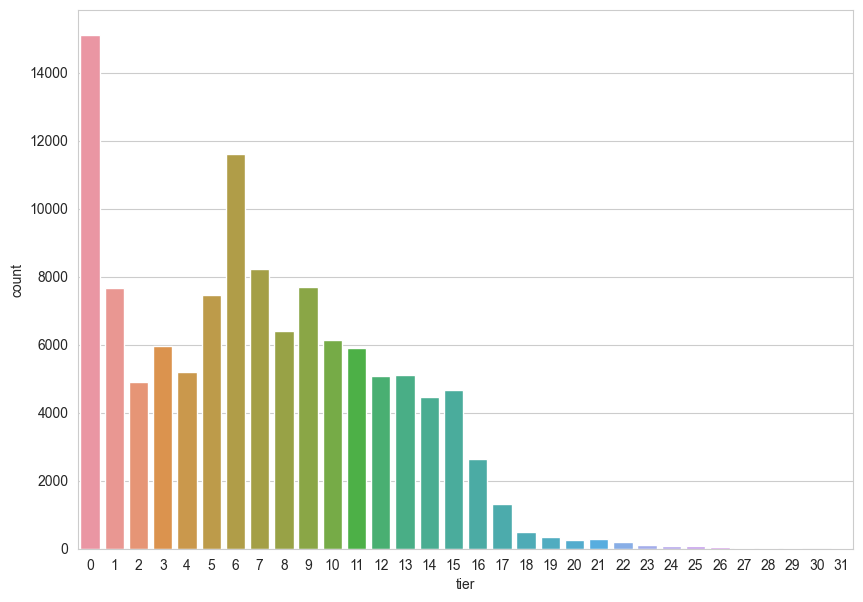

In [16]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x = user['tier'].value_counts().index, y = user['tier'].value_counts())

0티어가 제일 많고 그 다음으로는 6-7 (실버1,2) 티어에 유저가 가장 많이 분포해있음

#### - 유저별 푼 문제 데이터 통계

In [17]:
user['solvedCount'].describe()

count    117483.000000
mean        118.850327
std         216.577446
min           0.000000
25%          24.000000
50%          63.000000
75%         139.000000
max       12767.000000
Name: solvedCount, dtype: float64

유저별 푼 문제의 평균 개수는 118개

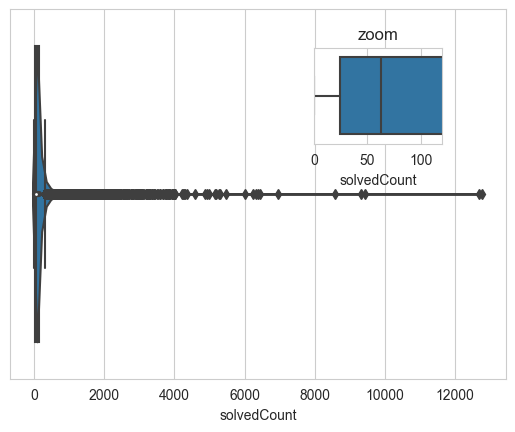

In [18]:
box_violin(user.solvedCount, 120)

유저별 푼 문제개수는 평균에 몰림

### problem 문제 데이터 분석

#### - NA 값 찾기

In [19]:
problem.isna().sum(axis=0)/len(problem)

problemId            0.000000
titleKo              0.000038
isSolvable           0.000000
acceptedUserCount    0.000000
level                0.000000
averageTries         0.000000
tags                 0.274811
dtype: float64

태그의 27퍼센트가 NA 값

#### - 문제 데이터 통계

In [20]:
problem.describe()

,problemId,acceptedUserCount,level,averageTries
count,26440.000000,26440.000000,26440.000000,26440.000000
mean,14717.751740,763.518533,10.333737,2.486625
std,7859.196265,6300.906614,8.074685,40.737875
min,1000.000000,0.000000,0.000000,0.000000
25%,8031.750000,3.000000,2.000000,1.146300
50%,14823.500000,15.000000,11.000000,1.800000
75%,21487.250000,74.000000,17.000000,2.728200
max,28247.000000,273706.000000,30.000000,6608.526000


averageTries의 max값의 데이터는 확인 필요

#### - 문제 데이터 고유값 개수

In [21]:
print('problemId 고유값: ', problem.problemId.nunique())
print('level 고유값: ', problem.level.nunique())
print('titleKo 고유값: ', problem.titleKo.nunique())
print('tags 고유값: ', len(set(problem.tags.dropna().explode())))

problemId 고유값:  26440
level 고유값:  31
titleKo 고유값:  24262
tags 고유값:  198


- acceptedUserCount

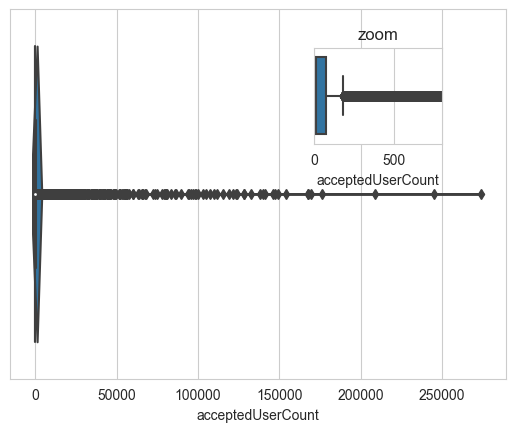

In [22]:
box_violin(problem.acceptedUserCount, 800)

문제별 맞은 사람 수가 평균인 760 근처로 쏠림

- averageTries

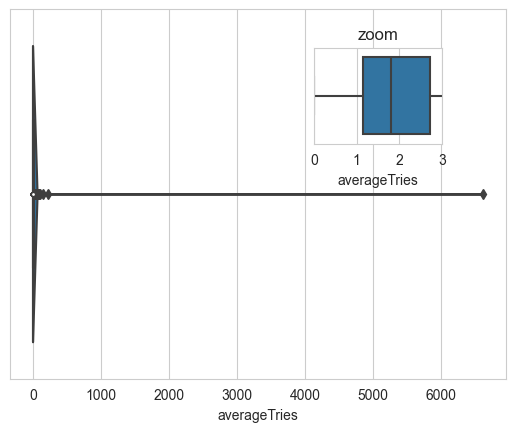

In [23]:
box_violin(problem.averageTries, 3)


이상치 max값 확인

In [24]:
problem[problem.averageTries == 6608.526]

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,tags
9429,10944,랜덤 게임~~,True,57,0,6608.526,None


- max값 제거 한 avergaeTries 그래프

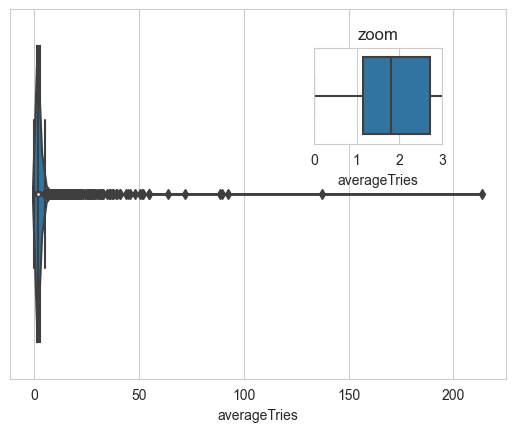

In [25]:
box_violin(problem[problem.averageTries!=6608.526].averageTries, 3)

제거 하기 전보다 조금 더 평균값으로 몰림

### 풀 수 없는문제 제거

In [10]:
problem = problem.drop(index = problem.loc[problem['isSolvable'] == False].index).reset_index(drop=True)
problem

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,official,tags
0,1000,A+B,True,245074,1,2.4848,True,"[implementation, arithmetic, math]"
1,1001,A-B,True,208618,1,1.4197,True,"[implementation, arithmetic, math]"
2,1002,터렛,True,32966,8,4.4892,True,"[case_work, geometry, math]"
3,1003,피보나치 함수,True,44843,8,3.0853,True,[dp]
4,1004,어린 왕자,True,13464,8,2.1931,True,"[geometry, math]"
...,...,...,...,...,...,...,...,...
26047,28232,Windcatchers,True,0,0,0.0000,True,None
26048,28233,Magic with Cards,True,4,10,1.5000,True,"[bfs, graphs, graph_traversal]"
26049,28234,Iranian Hazfi Cup,True,1,0,2.0000,True,None
26050,28246,돌 가져가기 게임,True,7,23,1.7143,True,"[dp, game_theory, knapsack]"


### 비공식 문제 제거

평균 시도 횟수 이상치인 6608번을 검색하니 비공식 문제이다. 비공식 문제들은 제거하는게 나을듯 보임

In [13]:
problem[problem.averageTries==6608.526]

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,official,tags
9290,10944,랜덤 게임~~,True,57,0,6608.526,False,None


In [14]:
problem = problem.drop(index = problem.loc[problem['official'] == False].index).reset_index(drop=True)
problem

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,official,tags
0,1000,A+B,True,245074,1,2.4848,True,"[implementation, arithmetic, math]"
1,1001,A-B,True,208618,1,1.4197,True,"[implementation, arithmetic, math]"
2,1002,터렛,True,32966,8,4.4892,True,"[case_work, geometry, math]"
3,1003,피보나치 함수,True,44843,8,3.0853,True,[dp]
4,1004,어린 왕자,True,13464,8,2.1931,True,"[geometry, math]"
...,...,...,...,...,...,...,...,...
25976,28232,Windcatchers,True,0,0,0.0000,True,None
25977,28233,Magic with Cards,True,4,10,1.5000,True,"[bfs, graphs, graph_traversal]"
25978,28234,Iranian Hazfi Cup,True,1,0,2.0000,True,None
25979,28246,돌 가져가기 게임,True,7,23,1.7143,True,"[dp, game_theory, knapsack]"


### 구데기컵 문제 제거

구데기컵이라고 신기한 문제들이 있는데 추천할만하지 않으니 제거하는게 좋아보임

In [15]:
gudegi = [24900, 24901, 24902, 24903, 24904, 24905, 24906, 24907, 24908, 24909, 24910, 24911, 
          21292, 21293, 21294, 21295, 21296, 21297, 21298, 21299, 
           18821, 18822, 18823, 18824, 18825, 18826, 18827, 18828, 18829, 18830, 18831, 18832, 18833, 18834, 18835, 18836, 
            17106, 17107, 17108, 17109, 17110, 17111, 17112, 17113, 17114, 17115, 17116, 17117, 17118, 17119, 17120, 
           15629, 15630, 15631, 15632, 15633, 15634, 15635, 15636, 15637, 15638, 15639, 15640, 15641, 15642, 15643]

In [16]:
problem = problem[~problem['problemId'].isin(gudegi)].reset_index(drop=True)
problem

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,official,tags
0,1000,A+B,True,245074,1,2.4848,True,"[implementation, arithmetic, math]"
1,1001,A-B,True,208618,1,1.4197,True,"[implementation, arithmetic, math]"
2,1002,터렛,True,32966,8,4.4892,True,"[case_work, geometry, math]"
3,1003,피보나치 함수,True,44843,8,3.0853,True,[dp]
4,1004,어린 왕자,True,13464,8,2.1931,True,"[geometry, math]"
...,...,...,...,...,...,...,...,...
25948,28232,Windcatchers,True,0,0,0.0000,True,None
25949,28233,Magic with Cards,True,4,10,1.5000,True,"[bfs, graphs, graph_traversal]"
25950,28234,Iranian Hazfi Cup,True,1,0,2.0000,True,None
25951,28246,돌 가져가기 게임,True,7,23,1.7143,True,"[dp, game_theory, knapsack]"


### 문제 레벨 분석

#### - 종류 확인

In [27]:
print(sorted(problem['level'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


#### - 종류 분포

<Axes: xlabel='level'>

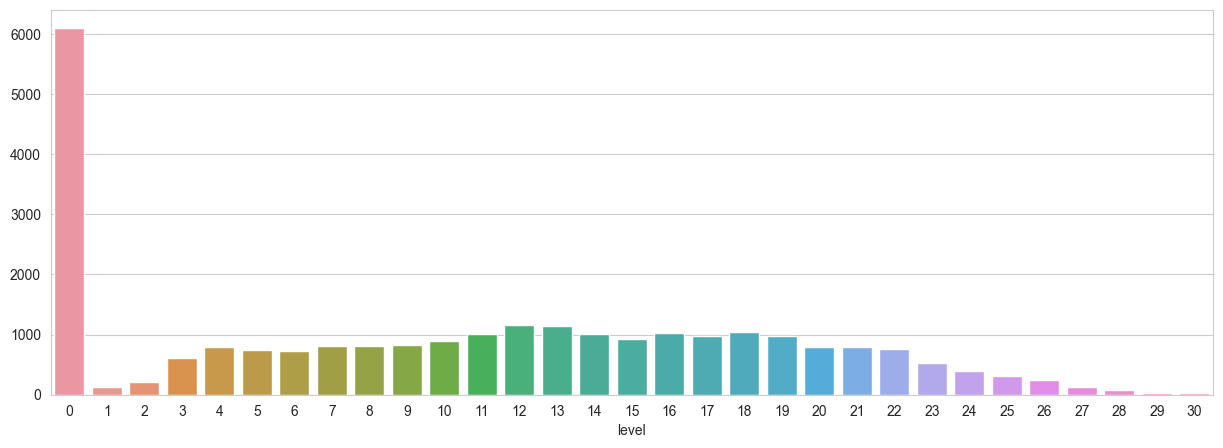

In [28]:
level_count = problem['level'].value_counts().sort_index()

plt.figure(figsize=(15,5))
sns.barplot(x=level_count.index, y=level_count.values)

0은 난이도가 매겨지지 않은 문제로 제외 후 다시 그래프 확인

<Axes: xlabel='level'>

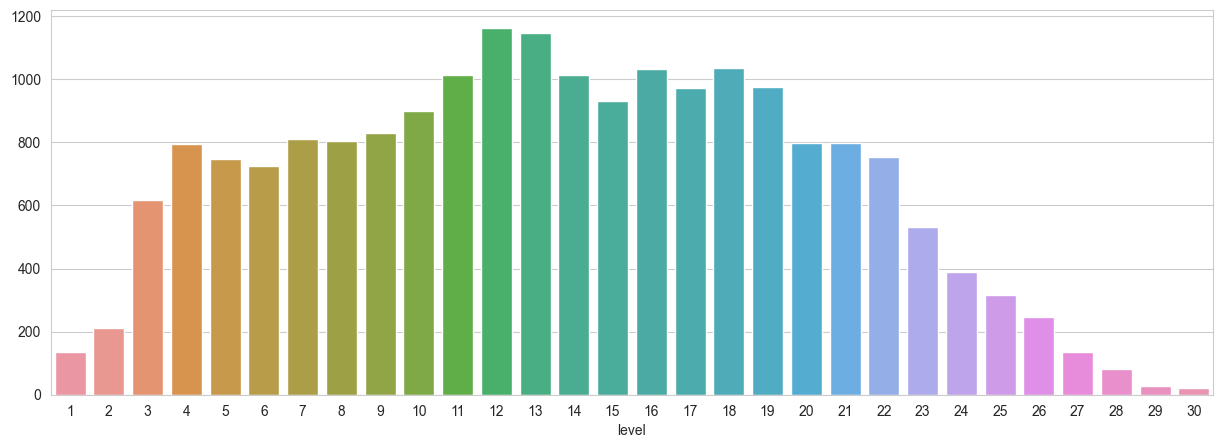

In [29]:
problem = problem.loc[problem['level'] != 0].reset_index(drop=True)
level_count = problem['level'].value_counts().sort_index()

plt.figure(figsize=(15,5))
sns.barplot(x=level_count.index, y=level_count.values)

골드 구간의 중간 난이도가 많다

### 문제 레벨별 데이터 분석

#### - 문제 레벨별 평균 시도 횟수

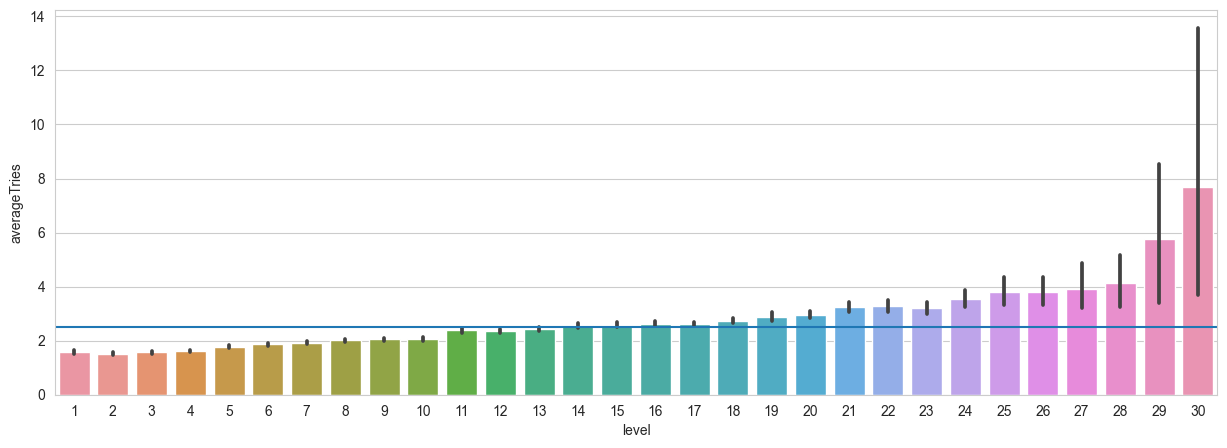

In [30]:
plt.figure(figsize=(15,5))
graph = sns.barplot(x=problem.level, y=problem.averageTries)
graph.axhline(np.mean(problem.averageTries))
plt.show()

#### - 문제 레벨별 맞힌 사람 수의 분포

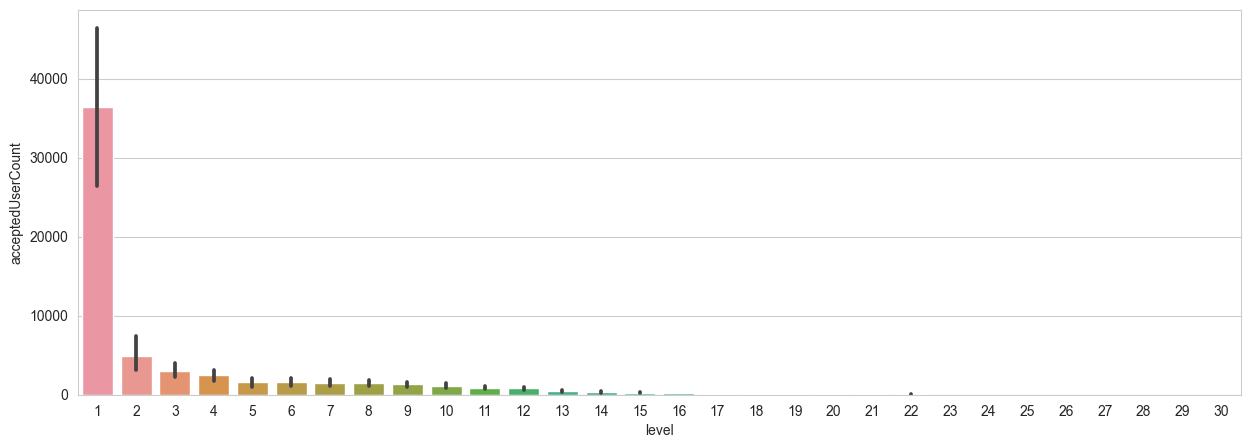

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(x=problem.level, y=problem.acceptedUserCount)
plt.show()

#### - 레벨1 을 제외한 분포

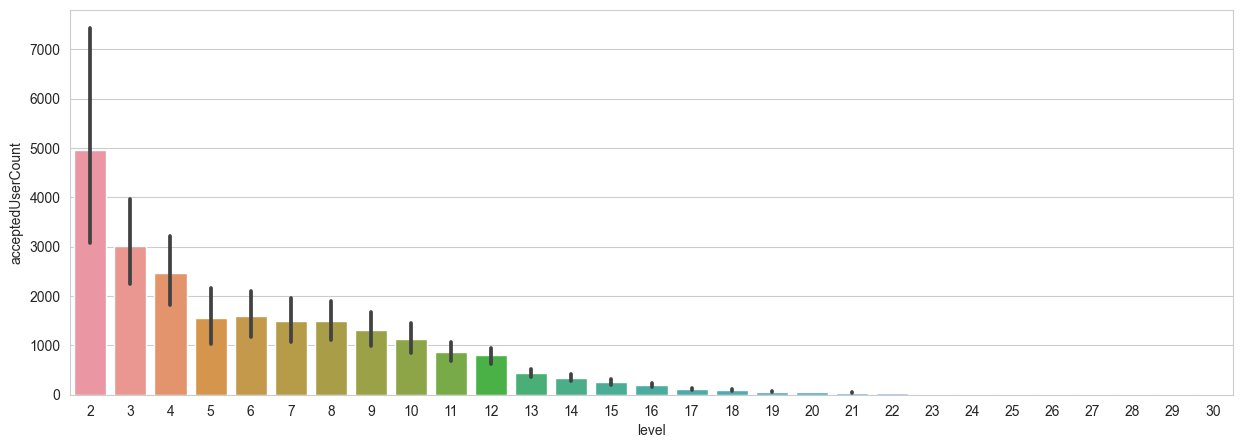

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(x=problem.loc[problem['level'] != 1].level, y=problem.acceptedUserCount)
plt.show()

1을 제외해도 레벨이 올라가면 푼 유저 수는 급격히 줄어듬

### 문제 레벨별 태그 분석

#### - 각 문제 레벨별 태그 종류 집계

In [33]:
# tags에 NA값 
dropna_problem = problem.dropna()

tag_count_level = {}

for x in problem.level.unique():
    count = dropna_problem[dropna_problem.level == x].tags.values
    tag_count = []
    for i in count:
        tag_count.extend(i)
    tag_count = pd.DataFrame(pd.Series(tag_count).value_counts())
    tag_count.reset_index(inplace=True, drop=False)
    tag_count.columns = ['tag', 'level'+str(x)]

    tag_count_level["level" + str(x)] = tag_count


#### - 레벨1 태그 분포

In [34]:
tag_count_level['level1']

,tag,level1
0,implementation,94
1,math,73
2,arithmetic,67
3,string,12
4,arbitrary_precision,11
5,geometry,2
6,combinatorics,1
7,simulation,1


#### - 레벨별 태그 종류 수 분포

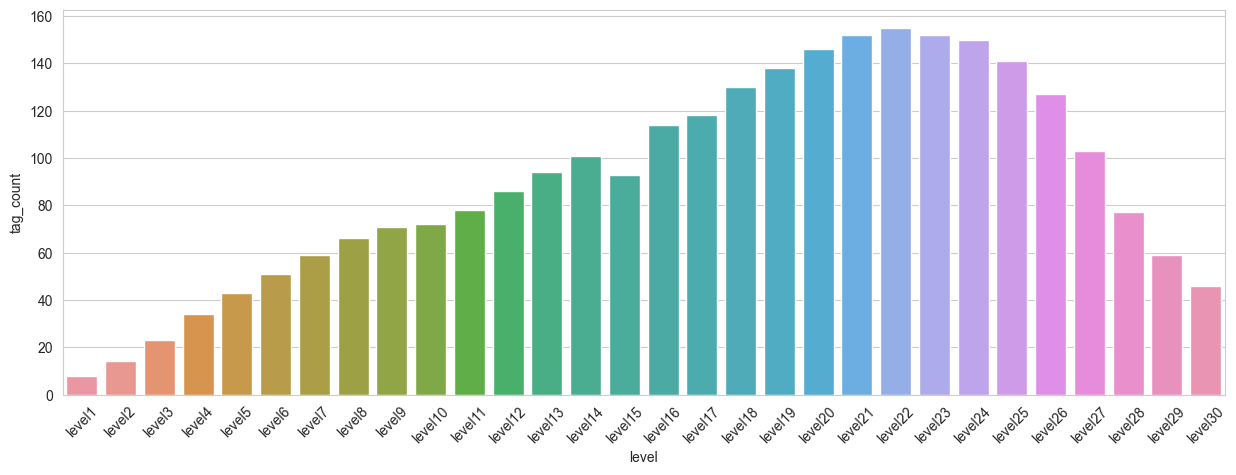

In [35]:
level = []
tag_count = []
for i in range(1,31):
    level.append(tag_count_level['level'+str(i)].columns[1])
    tag_count.append(tag_count_level['level'+str(i)]['tag'].nunique())

tag_count_df = pd.DataFrame()
tag_count_df['level'] = level
tag_count_df['tag_count'] = tag_count

plt.figure(figsize=(15,5))
graph = sns.barplot(x=tag_count_df.level, y=tag_count_df.tag_count)

for item in graph.get_xticklabels():
    item.set_rotation(45)

plt.show()

#### - 태그별 각 레벨에 등장 횟수

In [43]:
tag_all = pd.merge(tag_count_level['level1'], tag_count_level['level2'], on='tag', how='outer')

for i in range(3,31):
    tag_all = pd.merge(tag_all, tag_count_level['level'+str(i)], on='tag', how='outer')
    
tag_all

,tag,level1,level2,level3,level4,level5,level6,level7,level8,level9,...,level21,level22,level23,level24,level25,level26,level27,level28,level29,level30
0,implementation,94.0,135.0,423.0,603.0,491.0,404.0,319.0,261.0,182.0,...,42.0,36.0,37.0,35.0,23.0,24.0,11.0,6.0,9.0,6.0
1,math,73.0,138.0,390.0,338.0,266.0,194.0,224.0,214.0,222.0,...,173.0,171.0,106.0,101.0,69.0,56.0,38.0,25.0,6.0,7.0
2,arithmetic,67.0,118.0,288.0,194.0,99.0,28.0,21.0,16.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,string,12.0,31.0,92.0,283.0,219.0,152.0,138.0,115.0,86.0,...,36.0,34.0,33.0,13.0,16.0,12.0,12.0,1.0,1.0,1.0
4,arbitrary_precision,11.0,NaN,11.0,14.0,7.0,9.0,16.0,10.0,6.0,...,7.0,4.0,6.0,3.0,1.0,4.0,2.0,1.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,suffix_tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN
194,top_tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,2.0,1.0
195,rb_tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
196,hackenbush,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN


#### - 태그별 각 레벨에 등장 횟수 분포

In [44]:
tag_all_ratio = tag_all.copy()

level_que = pd.DataFrame(dropna_problem.level.value_counts())
level_que.reset_index(inplace=True, drop=False)
level_que.columns = ['levels', 'nums']

for i in range(1,31):
    tag_all_ratio['level'+str(i)] = tag_all['level'+str(i)]/level_que[level_que['levels'] == i].nums.values[0]

tag_all_ratio

,tag,level1,level2,level3,level4,level5,level6,level7,level8,level9,...,level21,level22,level23,level24,level25,level26,level27,level28,level29,level30
0,implementation,0.701493,0.633803,0.684466,0.757538,0.663514,0.558783,0.408451,0.341176,0.229219,...,0.057143,0.053571,0.077083,0.106383,0.085185,0.112676,0.086614,0.088235,0.36,0.315789
1,math,0.544776,0.647887,0.631068,0.424623,0.359459,0.268326,0.286812,0.279739,0.279597,...,0.235374,0.254464,0.220833,0.306991,0.255556,0.262911,0.299213,0.367647,0.24,0.368421
2,arithmetic,0.500000,0.553991,0.466019,0.243719,0.133784,0.038728,0.026889,0.020915,0.012594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,string,0.089552,0.145540,0.148867,0.355528,0.295946,0.210235,0.176697,0.150327,0.108312,...,0.048980,0.050595,0.068750,0.039514,0.059259,0.056338,0.094488,0.014706,0.04,0.052632
4,arbitrary_precision,0.082090,NaN,0.017799,0.017588,0.009459,0.012448,0.020487,0.013072,0.007557,...,0.009524,0.005952,0.012500,0.009119,0.003704,0.018779,0.015748,0.014706,NaN,0.105263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,suffix_tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.009390,0.023622,NaN,NaN,NaN
194,top_tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.009390,0.007874,NaN,0.08,0.052632
195,rb_tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.004695,NaN,NaN,NaN,NaN
196,hackenbush,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.007874,0.014706,NaN,NaN


#### - 문제별 태그 종류 수 분석

In [54]:
problem_tags = problem.tags
problem['tag_num'] = problem_tags.apply(lambda x: len(x))
problem.head()

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,tags,tag_num
0,1000,A+B,True,245074,1,2.4848,"[implementation, arithmetic, math]",3
1,1001,A-B,True,208618,1,1.4197,"[implementation, arithmetic, math]",3
2,1002,터렛,True,32966,8,4.4892,"[case_work, geometry, math]",3
3,1003,피보나치 함수,True,44843,8,3.0853,[dp],1
4,1004,어린 왕자,True,13464,8,2.1931,"[geometry, math]",2


#### - 문제별 태그 종류 수 분포

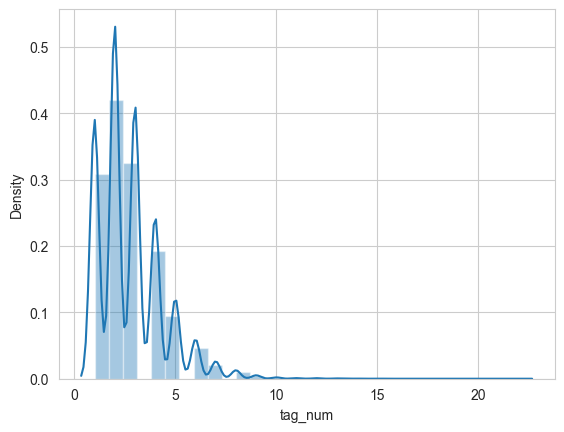

In [59]:
sns.distplot(problem.tag_num, bins=30)
plt.show()

문제별로 태그 2개인 경우가 제일 많다

## **비슷한 문제 탐색**

- 예시로 들 2023번 문제

In [188]:
problem.loc[problem.problemId == 2023]

,problemId,titleKo,isSolvable,acceptedUserCount,level,averageTries,tags
953,2023,신기한 소수,True,5244,11,2.2197,"[backtracking, math, number_theory, primality_..."


###  코사인 유사도

In [136]:
from sklearn.metrics.pairwise import cosine_similarity as cs
problem_idx = 953

#코사인 유사도
problem_test = problem[['problemId', 'titleKo', 'level', 'averageTries']]
set_tags = set(problem.tags.dropna().explode())
for i in list(set_tags):
    problem_test[i] = 0

for i in tqdm(range(len(problem))):
    tags = problem.iloc[i, 6]
    try:
        for tag in tags:
            problem_test.iloc[i, list(problem_test.columns).index(tag)] += 1
    except:
        pass
temp = problem_test.iloc[:, 2:].values
sim = cs(temp, temp)
sim_scores = list(enumerate(sim[problem_idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:20]
print(sim_scores)

100%|██████████| 19953/19953 [00:04<00:00, 4014.32it/s]


[(9719, 0.9956605167892647), (12374, 0.9956032071052906), (4923, 0.9950203121551273), (18950, 0.9948164111284898), (17358, 0.99460554244567), (9217, 0.9945861491085312), (2734, 0.9944808095298897), (5518, 0.9941306080759982), (9469, 0.994123860058852), (5714, 0.9938840279775032), (1589, 0.9936277874201402), (2439, 0.9935873669842137), (238, 0.9933445963794841), (17508, 0.9932426330106858), (4917, 0.9932016312464482), (9392, 0.99315585509565), (791, 0.993102565579431), (153, 0.9930684038686511), (11962, 0.9928988151999452)]


In [137]:
idx = np.array(sim_scores)[:, 0]
df_cos = problem_test.iloc[idx]
df_cos

,problemId,titleKo,level,averageTries,mst,sqrt_decomposition,graphs,dp_connection_profile,directed_mst,inclusion_and_exclusion,...,simulation,dp_tree,case_work,bitmask,polygon_area,pst,linear_algebra,centroid,constructive,smaller_to_larger
9719,14256,SSR,13,2.3333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12374,17355,Messi An-Gimossi,14,2.8987,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4923,7525,Number Tricks,14,2.3077,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18950,26570,Semiperfect,9,1.4545,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17358,24456,초콜릿 훔쳐 먹기,13,3.3111,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9217,13469,Older Brother,8,1.6375,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2734,4241,소수 없는 수열,14,2.6818,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5518,8583,Skracalne liczby pierwsze,13,1.2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9469,13875,Just in Time,13,1.8148,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5714,8880,인수,19,4.2308,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 유클리드 거리

In [138]:
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

In [148]:
list_dist = []
for i, j in tqdm(enumerate(temp)):
    list_dist.append((i, dist(temp[problem_idx], j)))
list_dist = sorted(list_dist, key = lambda x : x[1])
list_dist = list_dist[:20]
print(list_dist)

19953it [00:00, 150359.60it/s]

[(953, 0.0), (238, 1.33411604068012), (18510, 1.4273764605036752), (19650, 1.4523872210949806), (8822, 1.4734534129045276), (17670, 1.4751773079870771), (8370, 1.4806061461442066), (574, 1.4817059121161662), (1150, 1.4988700944378068), (18479, 1.5018086296196331), (19601, 1.5566471180071608), (8137, 1.5654531899740727), (2439, 1.5697240012180487), (2198, 1.615199086800138), (19206, 1.662648636964527), (2967, 1.6661286895075063), (14016, 1.6909550555824955), (11548, 1.7321485386652036), (639, 1.7322489543942579), (1297, 1.7323020088887504)]


In [149]:
df_euclidean = problem_test.iloc[np.array(list_dist)[1:, 0]]
df_euclidean

,problemId,titleKo,level,averageTries,mst,sqrt_decomposition,graphs,dp_connection_profile,directed_mst,inclusion_and_exclusion,...,simulation,dp_tree,case_work,bitmask,polygon_area,pst,linear_algebra,centroid,constructive,smaller_to_larger
238,1241,머리 톡톡,11,3.1028,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18510,25908,수열의 합,11,2.0263,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19650,27856,Sum of Remainders,11,1.8889,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8822,12994,이동3-2,11,2.6333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17670,24828,Random Digital Exponentiation,11,1.8000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8370,12438,새로운 달력 (Large),11,1.7813,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
574,1612,가지고 노는 1,11,2.6618,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1150,2247,실질적 약수,11,2.7163,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18479,25862,Give-a-Gnocchi,11,1.7143,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19601,27725,지수를 더하자,11,1.5692,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


코사인 유사도로 구한 방식보다 레벨이 전반적으로 비교 대상인 2023번이랑 비슷함

###  자카드 유사도

In [168]:
def jaccard(x, y):
    union = set(x).union(set(y))
    inter = set(x).intersection(set(y))
    return len(inter)/len(union)

In [183]:
list_jaccard = []
for i, j in tqdm(enumerate(temp)):
    list_jaccard.append((i, jaccard(temp[problem_idx], j)))
list_jaccard = sorted(list_jaccard, key = lambda x : x[1], reverse=True)
list_jaccard = list_jaccard[:60]
print(list_jaccard)
list_jaccard

19953it [00:01, 18771.53it/s]

[(953, 1.0), (2051, 0.75), (2431, 0.75), (2477, 0.75), (2743, 0.75), (2803, 0.75), (2850, 0.75), (3067, 0.75), (3097, 0.75), (3111, 0.75), (3254, 0.75), (3415, 0.75), (3789, 0.75), (3797, 0.75), (4201, 0.75), (4443, 0.75), (4455, 0.75), (4456, 0.75), (4466, 0.75), (4513, 0.75), (4526, 0.75), (4609, 0.75), (4629, 0.75), (4650, 0.75), (4651, 0.75), (5110, 0.75), (5135, 0.75), (5515, 0.75), (5520, 0.75), (5525, 0.75), (5547, 0.75), (5559, 0.75), (5560, 0.75), (5655, 0.75), (5686, 0.75), (6914, 0.75), (7652, 0.75), (7662, 0.75), (8295, 0.75), (8300, 0.75), (8500, 0.75), (9325, 0.75), (9423, 0.75), (9635, 0.75), (9649, 0.75), (9775, 0.75), (9785, 0.75), (10825, 0.75), (12637, 0.75), (12951, 0.75), (13567, 0.75), (15458, 0.75), (15466, 0.75), (15482, 0.75), (15492, 0.75), (15497, 0.75), (16015, 0.75), (16106, 0.75), (17463, 0.75), (17731, 0.75)]


[(953, 1.0),
 (2051, 0.75),
 (2431, 0.75),
 (2477, 0.75),
 (2743, 0.75),
 (2803, 0.75),
 (2850, 0.75),
 (3067, 0.75),
 (3097, 0.75),
 (3111, 0.75),
 (3254, 0.75),
 (3415, 0.75),
 (3789, 0.75),
 (3797, 0.75),
 (4201, 0.75),
 (4443, 0.75),
 (4455, 0.75),
 (4456, 0.75),
 (4466, 0.75),
 (4513, 0.75),
 (4526, 0.75),
 (4609, 0.75),
 (4629, 0.75),
 (4650, 0.75),
 (4651, 0.75),
 (5110, 0.75),
 (5135, 0.75),
 (5515, 0.75),
 (5520, 0.75),
 (5525, 0.75),
 (5547, 0.75),
 (5559, 0.75),
 (5560, 0.75),
 (5655, 0.75),
 (5686, 0.75),
 (6914, 0.75),
 (7652, 0.75),
 (7662, 0.75),
 (8295, 0.75),
 (8300, 0.75),
 (8500, 0.75),
 (9325, 0.75),
 (9423, 0.75),
 (9635, 0.75),
 (9649, 0.75),
 (9775, 0.75),
 (9785, 0.75),
 (10825, 0.75),
 (12637, 0.75),
 (12951, 0.75),
 (13567, 0.75),
 (15458, 0.75),
 (15466, 0.75),
 (15482, 0.75),
 (15492, 0.75),
 (15497, 0.75),
 (16015, 0.75),
 (16106, 0.75),
 (17463, 0.75),
 (17731, 0.75)]

In [186]:
df_jaccard = problem_test.iloc[np.array(list_jaccard)[1:, 0]]
df_jaccard.head(20)

,problemId,titleKo,level,averageTries,mst,sqrt_decomposition,graphs,dp_connection_profile,directed_mst,inclusion_and_exclusion,...,simulation,dp_tree,case_work,bitmask,polygon_area,pst,linear_algebra,centroid,constructive,smaller_to_larger
2051,3259,PEOPLE,11,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2431,3802,MANAGER,11,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2477,3875,Cubist Artwork,11,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2743,4252,Polly Nomials,11,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,4337,Ferry Loading II,11,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2850,4392,Airline Hub,11,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3067,4684,Mapmaker,11,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3097,4751,Extrusion,11,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3111,4776,Apply a Cold Compress,11,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3254,4976,Cut the Cake,11,1.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


자카드 유사도는 교집합, 합집합으로 유사한 문제를 찾기 떄문에 예시인 2023번 문제와 태그와 레벨이 비슷함

#### - 각 방법 별 태그 정확도 확인

- 코사인 유사도

In [203]:
df_cos[(df_cos.backtracking == 1) & (df_cos.number_theory == 1) & (df_cos.primality_test == 1)]

,problemId,titleKo,level,averageTries,mst,sqrt_decomposition,graphs,dp_connection_profile,directed_mst,inclusion_and_exclusion,...,simulation,dp_tree,case_work,bitmask,polygon_area,pst,linear_algebra,centroid,constructive,smaller_to_larger
2734,4241,소수 없는 수열,14,2.6818,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5518,8583,Skracalne liczby pierwsze,13,1.2000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17508,24612,Sleeping in Class,22,4.3846,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- 유클리드 거리

In [204]:
df_euclidean[(df_euclidean.backtracking == 1) & (df_euclidean.number_theory == 1) & (df_euclidean.primality_test == 1)]
    

,problemId,titleKo,level,averageTries,mst,sqrt_decomposition,graphs,dp_connection_profile,directed_mst,inclusion_and_exclusion,...,simulation,dp_tree,case_work,bitmask,polygon_area,pst,linear_algebra,centroid,constructive,smaller_to_larger


- 자카드 유사도

In [205]:
df_jaccard[(df_euclidean.backtracking == 1) & (df_jaccard.number_theory == 1) & (df_jaccard.primality_test == 1)]
    

,problemId,titleKo,level,averageTries,mst,sqrt_decomposition,graphs,dp_connection_profile,directed_mst,inclusion_and_exclusion,...,simulation,dp_tree,case_work,bitmask,polygon_area,pst,linear_algebra,centroid,constructive,smaller_to_larger


자카드 유사도와 유클리드 거리는 레벨까지 비슷한 문제를 추천해주지만 태그 정확도는 코사인 유사도 방식이 제일 높다